# Seaborn学习笔记

以下笔记是自己学习Seaborn官方文档中整理的，供学习使用。除了Seaborn的官方文档，也参考了网上的一些资料。

如果有问题，可联系作者。

email：frankchenbjcn@hotmail.com

Github address：https://github.com/frankchenbjcn/Visualization

版本：v1.0 

完成时间：2018-06-02

## 数据获取 Data Acquisition

In [4]:
import os

cur_dir = os.getcwd()
data_dir = cur_dir+'\\data'

if os.path.isdir(cur_dir+'\\result'):
    print("the folder has already existed.")    
else:
    os.mkdir(cur_dir+'\\result')
        
rs_dir = cur_dir+'\\result'
    

import pandas as pd
import numpy as np

train_data = pd.read_csv(data_dir+'\\train.csv', encoding='utf-8', dtype={'id':str}, index_col='id')
train_data.head(5)

the folder has already existed.


,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,B,A,A,A,A,B,A,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
2,A,B,A,A,A,A,A,A,B,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
5,A,B,A,A,B,A,A,A,B,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
10,B,B,A,B,A,A,A,A,B,A,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
11,A,B,A,B,A,A,A,A,B,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [5]:
print('{} records of data with {} variables.'.format(*train_data.shape))

print(train_data.dtypes)

print(round(train_data.describe(),2))

188318 records of data with 131 variables.
cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cat10      object
cat11      object
cat12      object
cat13      object
cat14      object
cat15      object
cat16      object
cat17      object
cat18      object
cat19      object
cat20      object
cat21      object
cat22      object
cat23      object
cat24      object
cat25      object
cat26      object
cat27      object
cat28      object
cat29      object
cat30      object
           ...   
cat102     object
cat103     object
cat104     object
cat105     object
cat106     object
cat107     object
cat108     object
cat109     object
cat110     object
cat111     object
cat112     object
cat113     object
cat114     object
cat115     object
cat116     object
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
con

In [65]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## 设置绘图环境 Setting

seaborn的设置主要三种:style，scale，color。
每种设置都会有一个函数提供所有可以设置的变量，另外一个函数用于设置：
1. style设置：显示函数axes_style，设置函数set_style
2. scale设置：显示函数plotting_context，设置函数set_context
3. color设置：显示函数color_palette，设置函数set_palette    

### 综合设置 combined setting

如果没有定制化的要求，一般可以使用set函数做综合设定，以下是最常用的设定方式。

In [34]:
sns.set() #set to the Seaborn default setting
sns.set(style='darkgrid', color_codes=True)

### 样式设置 style setting

seaborn提供5种figure style：darkgrid(default), whitegrid, dark, white, ticks。可以通过set_style函数设置.
例如：sns.set_style("whitegrid") 。

另外，通过aexes_style函数可以显示所有可以设置的参数，并通过set_style函数的rc变量进行设置，传入rc变量的必须是字典结构。
例如：sns.set_style("darkgrid", rc={"axes.facecolor": ".5"})。

In [35]:
sns.axes_style()
# 显示所有style的参数

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#EAEAF2',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 0.0,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

In [36]:
sns.set_style("darkgrid") 
#sns.set_style("darkgrid",rc={"axes.facecolor": ".5"}) 
# 5 kinds of figure styles: darkgrid(default), whitegrid, dark, white, ticks

### 尺寸设置 scale setting

In [37]:
sns.plotting_context()
# 显示所有scale的参数

{'axes.labelsize': 11.0,
 'axes.titlesize': 12.0,
 'figure.figsize': [8.0, 5.5],
 'font.size': 12.0,
 'grid.linewidth': 1.0,
 'legend.fontsize': 10.0,
 'lines.linewidth': 1.75,
 'lines.markeredgewidth': 0.0,
 'lines.markersize': 7.0,
 'patch.linewidth': 0.3,
 'xtick.labelsize': 10.0,
 'xtick.major.pad': 7.0,
 'xtick.major.width': 1.0,
 'xtick.minor.width': 0.5,
 'ytick.labelsize': 10.0,
 'ytick.major.pad': 7.0,
 'ytick.major.width': 1.0,
 'ytick.minor.width': 0.5}

In [38]:
sns.set_context('notebook')
# 4 kinds of plotting scale: notebook (default), paper, talk, poster

### 颜色设置 color setting

Seaborn默认颜色主题共有六种不同的变化分别是：deep, muted, pastel, bright, dark, colorblind。

在seaborn绘图函数中的palette参数中，有以下几种设置方法:
1. palette=None will return the current matplotlib color cycle.
2. seaborn color palette:deep, muted, bright, pastel, dark, colorblind
3. other palette: hls, husl, any named matplotlib palette, list of colors
4. color set e.g.Set1/Set2/Set3
5. Matplotlib paletes can be specified as reversed palettes by appending “_r” to the name or as dark palettes by appending “_d” to the name. (These options are mutually exclusive, but the resulting list of colors can also be reversed).e.g. Greens_r,Greens_d
6. dict e.g. {"male": "g", "female": "m"}

In [39]:
sns.color_palette()
# 显示所有color的参数

[(0.29803921568627451, 0.44705882352941179, 0.69019607843137254),
 (0.33333333333333331, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.30588235294117649, 0.32156862745098042),
 (0.50588235294117645, 0.44705882352941179, 0.69803921568627447),
 (0.80000000000000004, 0.72549019607843135, 0.45490196078431372),
 (0.39215686274509803, 0.70980392156862748, 0.80392156862745101)]

In [40]:
sns.set_palette("husl")

### 其它设置 other setting

In [67]:
plt.rc("font",family="SimHei",size="12")  #用于解决中文显示不了的问题

warnings.filterwarnings('ignore')   #忽略了警告错误的输出

np.random.seed(sum(map(ord, "distributions")))       
# ord()函数它以一个字符（长度为1的字符串）作为参数，返回对应的ASCII数值，或者Unicode数值.
# 如果所给的Unicode字符超出了你的Python定义范围，则会引发一个TypeError的异常.
# 利用np.random.seed()函数设置相同的seed，每次生成的随机数相同。如果不设置seed，则每次会生成不同的随机数.



注：以下在绘图的过程中，对于计算资源消耗大的绘图，仅使用1000条记录绘图。



## 一元连续变量绘图 Plot One Continous Variable

seaborn主要有三个函数：distplot（直方图/kde图）、kdeplot（kde图）、boxplot（箱形图）。
boxplot的主要用途是在多元变量分析时，因此在一元变量中仅简单介绍。


### distplot函数


displot()集合了matplotlib的hist()与核函数估计kdeplot的功能，增加了rugplot分布观测条显示与利用scipy.stats库fit拟合参数分布的新颖用途。具体用法如下：

distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)

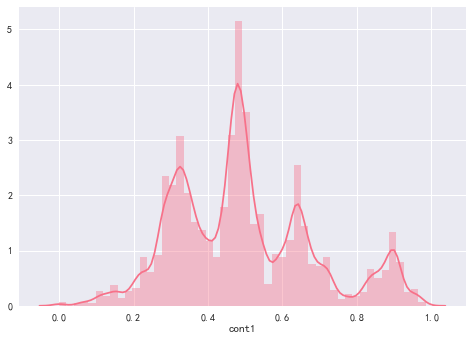

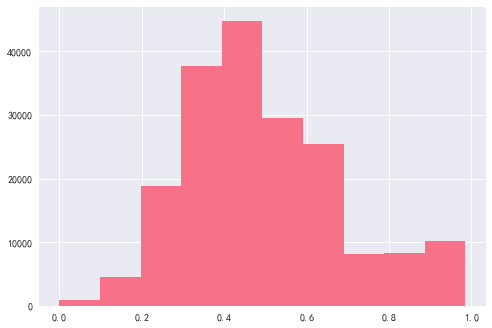

In [57]:
x = train_data.cont1

sns.distplot(x)
plt.show()

# 使用matplotlib库的hist函数
plt.hist(x)
plt.show()

#### hist/kde：用hist和kde来控制是histogram还是kernel density estimation，默认两者同时

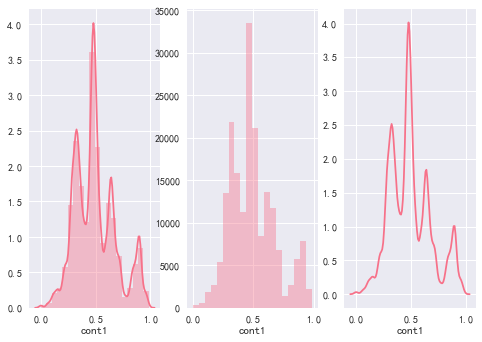

In [42]:
x = train_data.cont1

fig,axes = plt.subplots(1,3)
sns.distplot(x, bins=20, hist=True, kde=True, rug=False, ax= axes[0])
sns.distplot(x, bins=20, hist=True, kde=False, rug=False, ax= axes[1])
sns.distplot(x, bins=20, hist=False, kde=True, rug=False, ax= axes[2])
plt.show()

#### bins：int或list，控制直方图的划分

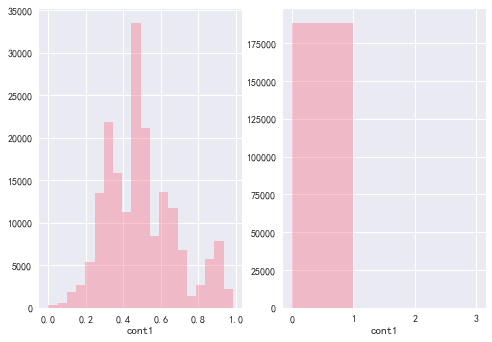

In [43]:
fig,axes=plt.subplots(1,2) 
sns.distplot(x,kde=False,bins=20,ax=axes[0]) #左图：分成20个区间
sns.distplot(x,kde=False,bins=[x for x in range(4)],ax=axes[1]) #右图：以0,1,2,3为分割点，形成区间[0,1],[1,2],[2,3]，区间外的值不计入。
plt.show()

#### rug：控制是否生成观测数值的小细条，数据量超过1000条时建议不要使用这个功能

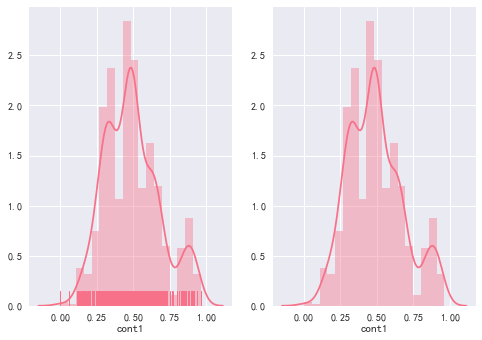

In [44]:
x_1000 = x[0:1000]

fig,axes=plt.subplots(1,2)
sns.distplot(x_1000,rug=True,ax=axes[0]) #左图
sns.distplot(x_1000,ax=axes[1]) #右图
plt.show()

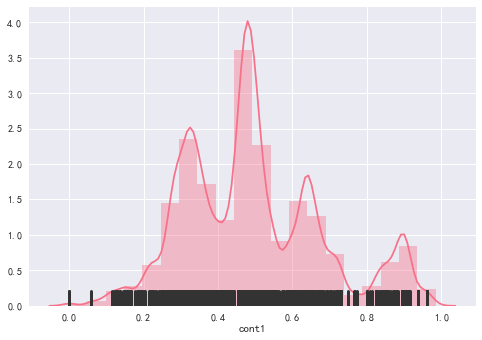

In [45]:
# 除了以上的，通过distplot中rug参数外，也通过rugplot函数额外增加
sns.distplot(x, bins=20, hist=True, kde=True, rug=False)
sns.rugplot(x_1000, color=".2", linewidth=3)
plt.show()

#### fit：控制拟合的参数分布图形，能够直观地评估它与观察数据的对应关系，习惯上使用scipy.stats库的分布函数

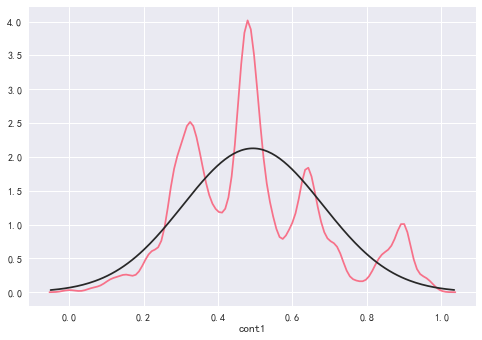

In [46]:
from scipy import stats # from scipy.stats import *
sns.distplot(x,hist=False,fit=stats.norm) #拟合标准正态分布
plt.show()

#### norm_hist：若为True, 则直方图高度显示密度而非计数(含有kde图像中默认为True)

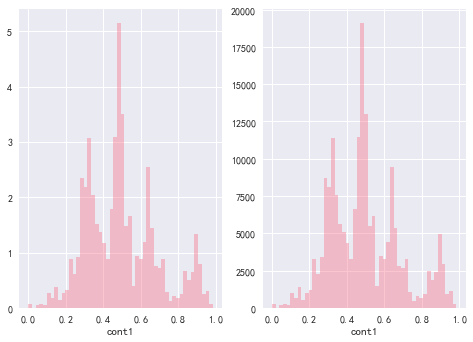

In [47]:
fig,axes=plt.subplots(1,2)
sns.distplot(x,norm_hist=True,kde=False,ax=axes[0]) #左图
sns.distplot(x,kde=False,ax=axes[1]) #右图
plt.show()

#### hist_kws, kde_kws, rug_kws, fit_kws参数接收字典类型，可以自行定义更多高级的样式

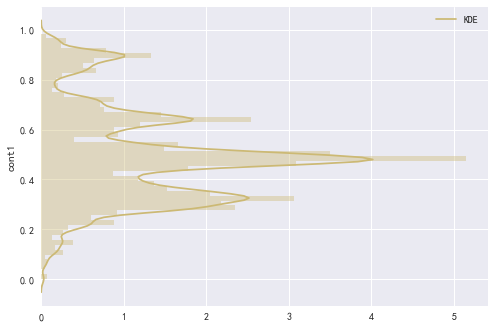

In [48]:
sns.distplot(x,kde_kws={"label":"KDE"},vertical=True,color="y")
plt.show()

### kdeplot函数

核密度估计(kernel density estimation)是在概率论中用来估计未知的密度函数，属于非参数检验方法之一。通过核密度估计图可以比较直观的看出数据样本本身的分布特征。具体用法如下：

kdeplot(data, data2=None, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, ax=None, **kwargs)

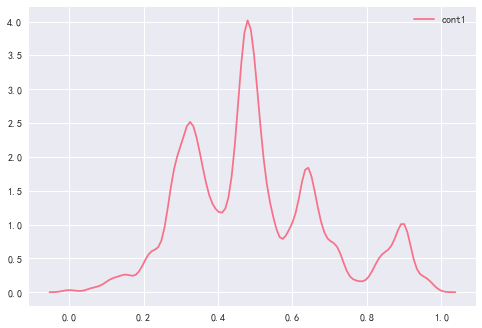

In [58]:
sns.kdeplot(x)
plt.show()

#### cut：参数表示绘制的时候，切除带宽往数轴极限数值的多少(默认为3)

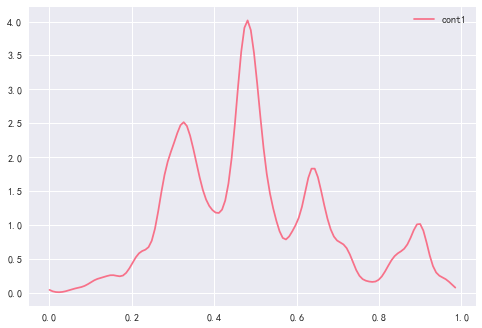

In [49]:
sns.kdeplot(x,cut=0)
plt.show()

#### cumulative ：是否绘制累积分布

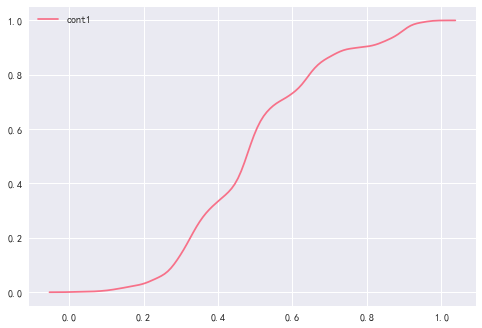

In [50]:
sns.kdeplot(x,cumulative=True)
plt.show()

#### shade：若为True，则在kde曲线下面的区域中进行阴影处理，color控制曲线及阴影的颜色

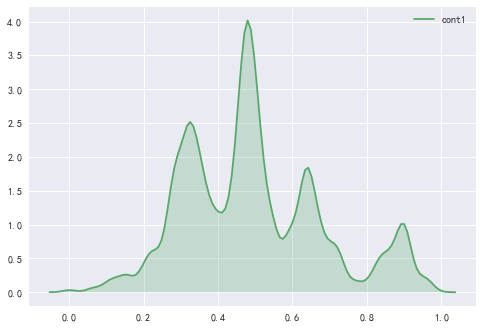

In [51]:
sns.kdeplot(x,shade=True,color="g")
plt.show()

#### bw：用来控制kernel的size

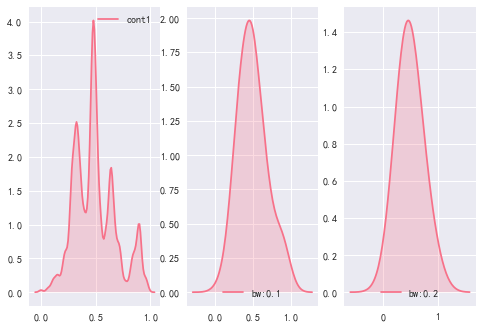

In [52]:
fig,axes = plt.subplots(1,3)
sns.kdeplot(x, shade=True, ax=axes[0])
sns.kdeplot(x, shade=True, bw=0.1, label='bw:0.1',ax=axes[1])
sns.kdeplot(x, shade=True, bw=0.2, label='bw:0.2',ax=axes[2])
# plt.legend()
plt.show()

### boxplot函数

箱形图（Box-plot）又称为盒须图、盒式图或箱线图，是一种用作显示一组数据分散情况资料的统计图。它能显示出一组数据的最大值、最小值、中位数及上下四分位数。因形状如箱子而得名。在各种领域也经常被使用，常见于品质管理。

具体用法如下：
boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)


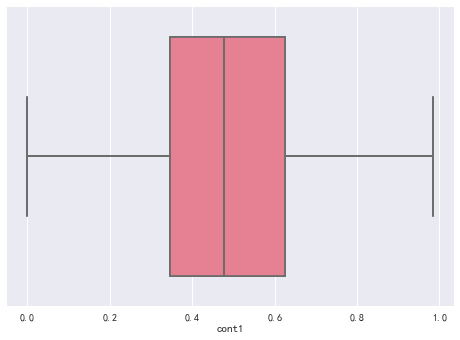

In [84]:
sns.boxplot(x)
plt.show()

## 二元连续变量绘图 Plot Two Continous Variables


### kdeplot函数
kdeplot函数还可以绘制二元连续变量的kde图像。


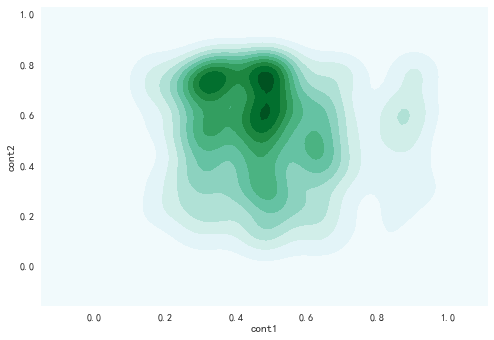

In [60]:
y=train_data.cont2
y_1000=train_data.cont2[0:1000]

sns.kdeplot(x_1000,y_1000,shade=True)
plt.show()

### jointplot函数

具体用法如下：
jointplot(x, y, data=None, kind='scatter', stat_func=<function pearsonr at 0x000001BDC995CD90>, color=None, size=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)


#### 散点图 scatter plot

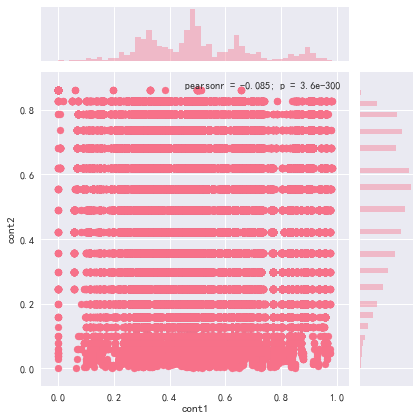

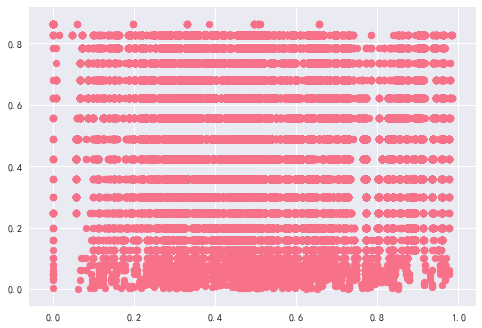

In [92]:
sns.jointplot(x='cont1',y='cont2', data=train_data, kind='scatter')
plt.show()

# 使用matplotlib库的scatter函数
plt.scatter(x, y)
plt.show()

#### 六边形图 hexbin plot

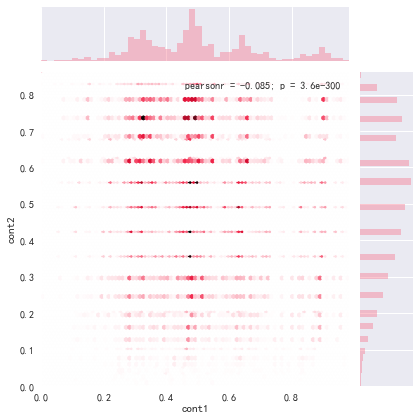

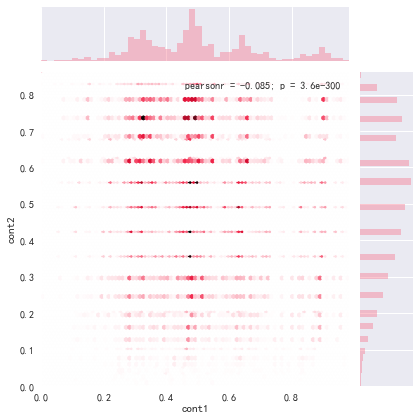

In [63]:
sns.jointplot(x='cont1',y='cont2', data=train_data, kind='hex')
plt.show()

#### kde图 kernel density estimation

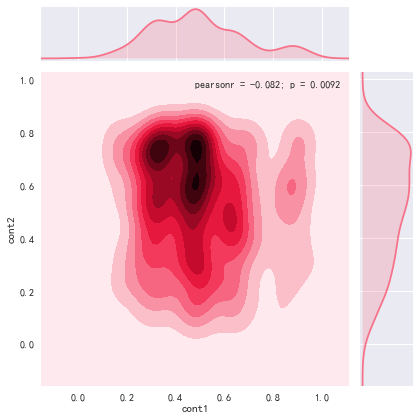

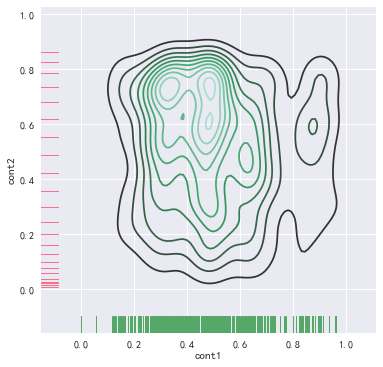

In [68]:
# method 1
sns.jointplot(x='cont1',y='cont2', data=train_data[0:1000], kind='kde')
plt.show()

# method 2
fig, axes = plt.subplots(figsize=(6, 6))
sns.kdeplot(x_1000, y_1000, ax=axes)
sns.rugplot(x_1000, color="g", ax=axes)
sns.rugplot(y_1000, vertical=True, ax=axes)
plt.show()

#### 散点图和kde图组合 combine the scatter with kde

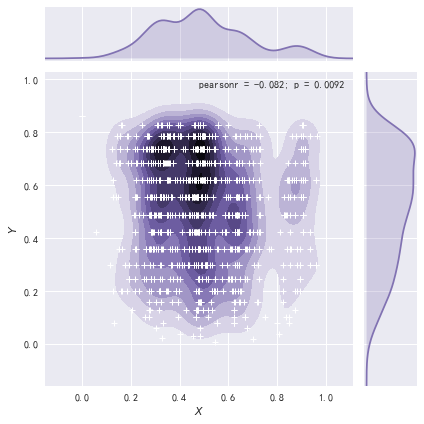

In [77]:
# jointplot是FacetGrid对象，可以使用各种set函数设置
g = sns.jointplot(x='cont1', y='cont2', data=train_data[0:1000], kind='kde', color='m')
g.plot_joint(plt.scatter, c='w', s=30, linewidth=1, marker="+") # 增加scatter plot
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$") # 设置X/Y轴
plt.show()

## 一元类别变量绘图 Plot One Categorical Variable


### countplot函数

一个计数图可以被认为是一个分类直方图，而不是定量的变量。基本的api和选项与barplot（）相同，因此您可以比较嵌套变量中的计数。（工作原理就是对输入的数据分类，条形图显示各个分类的数量）。

具体用法如下：
seaborn.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
注：countplot参数和barplot基本差不多，可以对比着记忆，有一点不同的是countplot中不能同时输入x和y，且countplot没有误差棒。

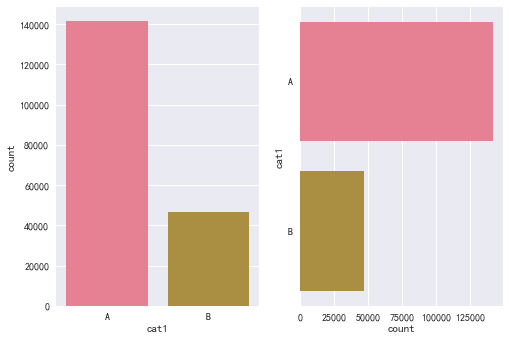

In [127]:
fig,axes=plt.subplots(1,2)
sns.countplot(x="cat1",data=train_data,ax=axes[0]) #左图
sns.countplot(y="cat1",data=train_data,ax=axes[1]) #右图
plt.show()

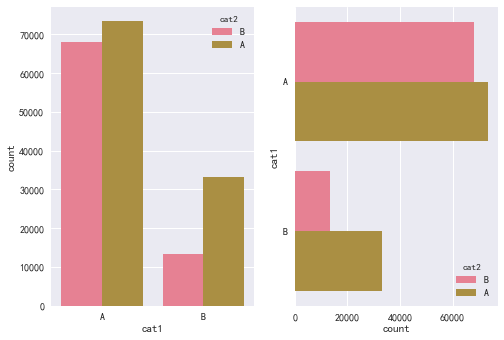

In [131]:
fig,axes=plt.subplots(1,2)
sns.countplot(x="cat1",hue="cat2",data=train_data,ax=axes[0]) #左图
sns.countplot(y="cat1",hue="cat2",data=train_data,ax=axes[1]) #右图
plt.show()

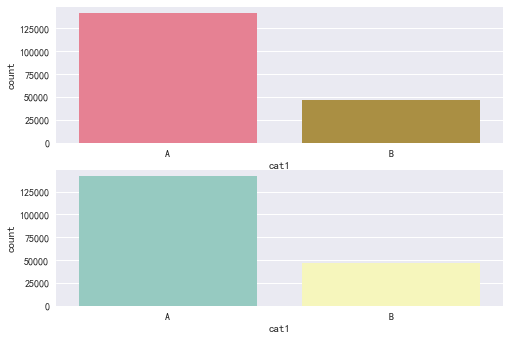

In [133]:
fig,axes=plt.subplots(2,1)
sns.countplot(x="cat1",data=train_data,ax=axes[0]) #上图
sns.countplot(x="cat1",data=train_data,palette="Set3",ax=axes[1]) #下图
plt.show()

## 绘制多元连续和类别变量 Plot Multiple Variables

主要使用函数pairplot、boxplot、barplot、pointplot。

pairplot函数用来绘制两两关系，只能显示连续变量的关系，对于输入类别变量会自动剔除。

boxplot函数用于绘制多元箱型图，可以支持类别变量。

另外还有，stripplot、swarmplot。


### pairplot函数：plot pairwise relationships

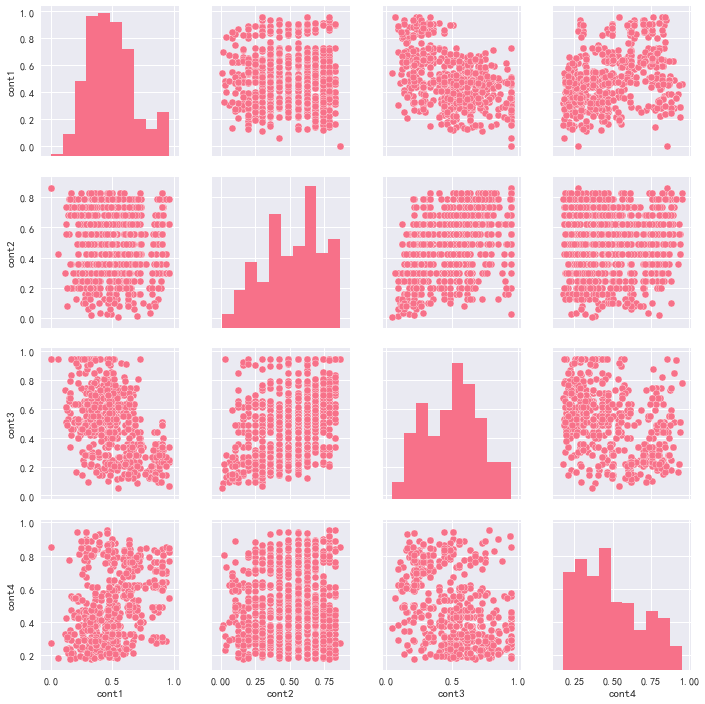

In [81]:
df = train_data[['cont1','cont2','cont3','cont4']][0:1000]

sns.pairplot(df)
plt.show()

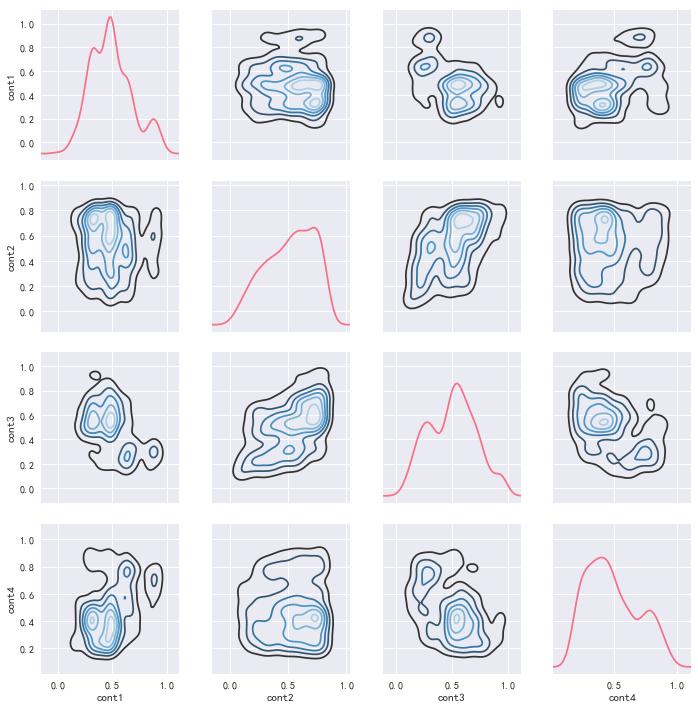

In [82]:
# 也可以使用PairGrid对象直接创建 using PairGrid to create PairGrid
g = sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap='Blues_d', n_levels=6)
plt.show()

### boxplot函数

具体用法如下：
boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)


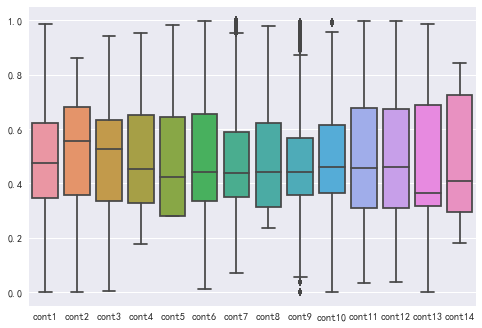

In [88]:
sns.boxplot(data=train_data.loc[:,'cont1':'cont14'])
plt.show()

#### orient："v"|"h" 用于控制图像使水平还是竖直显示（这通常是从输入变量的dtype推断出来的，此参数一般当不传入x、y，只传入data的时候使用）

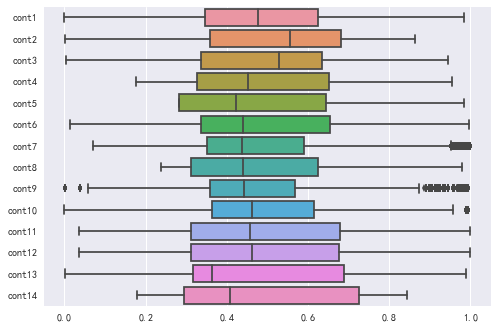

In [89]:
sns.boxplot(data=train_data.loc[:,'cont1':'cont14'],orient="h")
plt.show()

#### hue：str变量，dataframe的列名，按照列名中的值分类形成分类的条形图

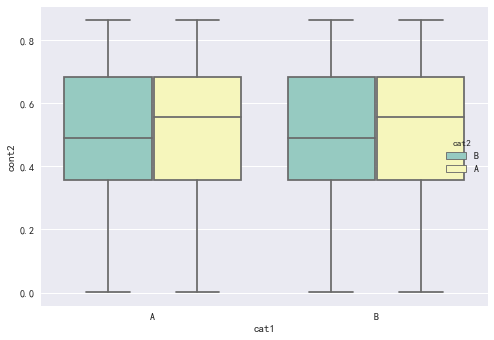

In [87]:
sns.boxplot(x="cat1",y="cont2",data=train_data,hue="cat2",palette="Set3")
plt.show()

#### palette：调色板，控制图像的色调

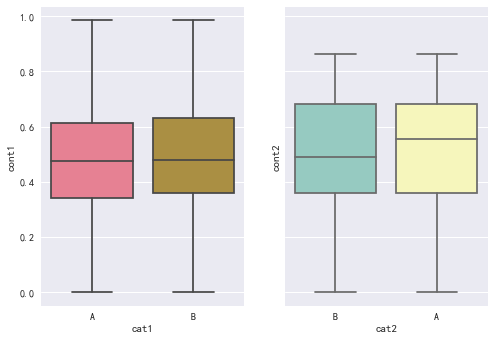

In [86]:
fig,axes=plt.subplots(1,2,sharey=True)
sns.boxplot(x="cat1",y="cont1",data=train_data,ax=axes[0]) #左图
sns.boxplot(x="cat2",y="cont2",data=train_data,palette="Set3",ax=axes[1]) #右图
plt.show()

#### order, hue_order (lists of strings)：用于控制条形图的顺序

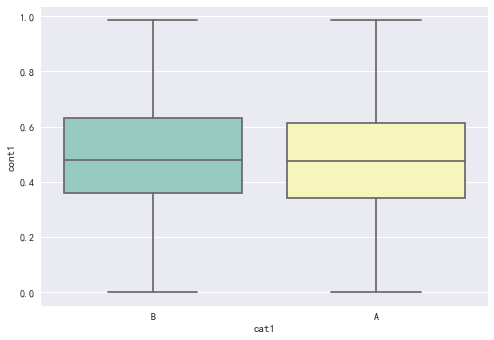

In [98]:
sns.boxplot(x="cat1",y="cont1",data=train_data,palette="Set3",order=['B','A']) 
plt.show()

#### fliersize：float，用于指示离群值观察的标记大小

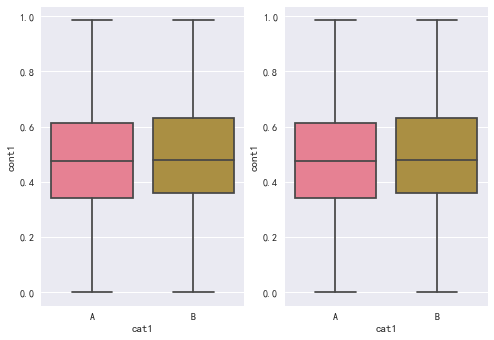

In [102]:
fig,axes=plt.subplots(1,2)
sns.boxplot(x="cat1",y="cont1",data=train_data,ax=axes[0]) #fliersize默认为5
sns.boxplot(x="cat1",y="cont1",data=train_data,fliersize=20,ax=axes[1])  
plt.show()

#### whis：确定离群值的上下界（IQR超过低和高四分位数的比例），此范围之外的点将被识别为异常值。IQR指的是上下四分位的差值。

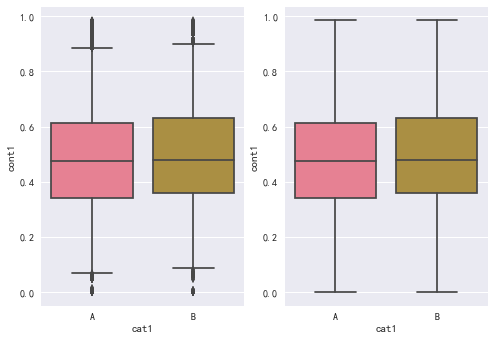

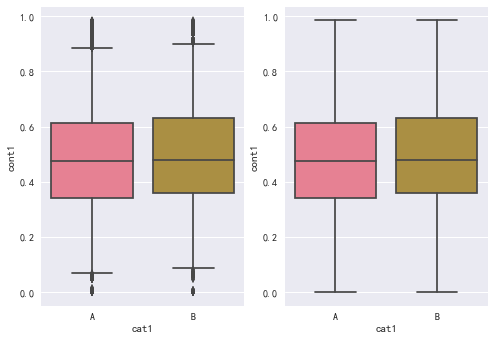

In [104]:
fig,axes=plt.subplots(1,2)
sns.boxplot(x="cat1",y="cont1",data=train_data,whis=1,ax=axes[0])  #左图
sns.boxplot(x="cat1",y="cont1",data=train_data,whis=2,ax=axes[1])  #右图
plt.show()

#### width：float，控制箱型图的宽度

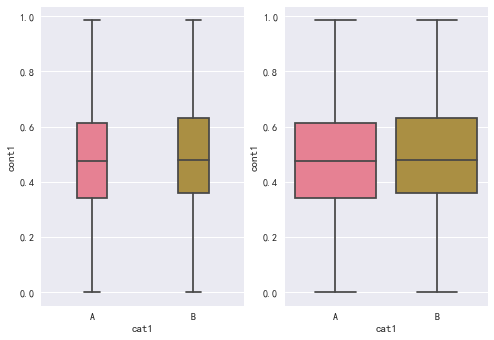

In [105]:
fig,axes=plt.subplots(1,2)
sns.boxplot(x="cat1",y="cont1",data=train_data,width=0.3,ax=axes[0])  #左图
sns.boxplot(x="cat1",y="cont1",data=train_data,width=0.8,ax=axes[1])  #右图
plt.show()

### violinplot函数：combine the boxplot with kde

violinplot与boxplot扮演类似的角色，它显示了定量数据在一个（或多个）分类变量的多个层次上的分布，这些分布可以进行比较。不像箱形图中所有绘图组件都对应于实际数据点，小提琴绘图以基础分布的核密度估计为特征。

具体用法如下：
violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)

在这里就不再介绍x，y，hue，data，order，hue_order，palette参数的用法，这些参数的用法和之前介绍的图形的用法是一样的，如有需要可以查看之前的内容。
先来画一个小提琴图：

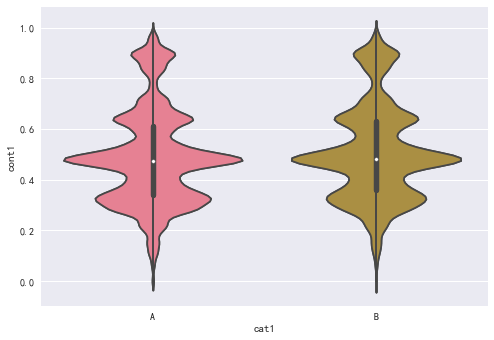

In [108]:
sns.violinplot(x="cat1",y="cont1",data=train_data)
plt.show()

#### split：将split设置为true则绘制分拆的violinplot以比较经过hue拆分后的两个量

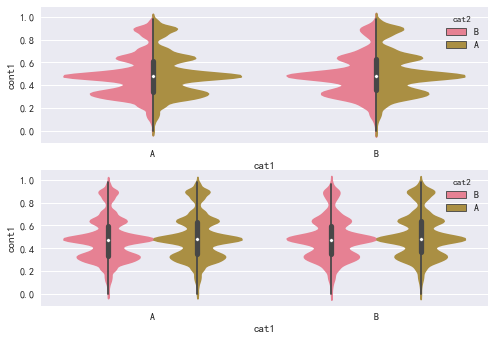

In [113]:
fig,axes=plt.subplots(2,1)
sns.violinplot(x="cat1",y="cont1",data=train_data,hue="cat2",split=True,ax=axes[0]) #上图，拆分后的图
sns.violinplot(x="cat1",y="cont1",data=train_data,hue="cat2",ax=axes[1]) #下图
plt.show()

#### scale_hue：bool，当使用色调变量（hue参数）嵌套小提琴时，此参数确定缩放是在主要分组变量（scale_hue = true）的每个级别内还是在图上的所有小提琴（scale_hue = false）内计算出来的。

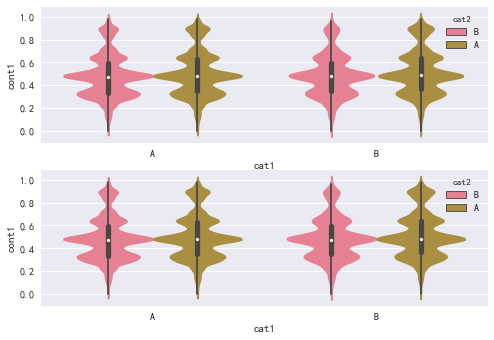

In [117]:
fig,axes=plt.subplots(2,1)
ax=sns.violinplot(x="cat1",y="cont1",data=train_data,hue="cat2",scale_hue=False,ax=axes[0]) #上图
ax=sns.violinplot(x="cat1",y="cont1",data=train_data,hue="cat2",scale_hue=True,ax=axes[1]) #下图
plt.show()

#### inner：控制violinplot内部数据点的表示，有“box”, “quartile”, “point”, “stick”四种方式。

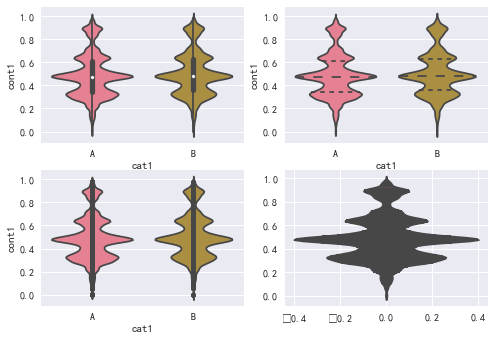

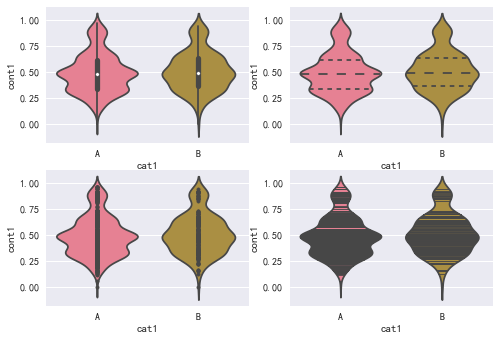

In [120]:
train_data_1000=train_data[0:1000]

fig,axes=plt.subplots(2,2)
sns.violinplot(x="cat1",y="cont1",data=train_data_1000,inner="box",ax=axes[0,0]) #钢琴图内显示箱型图（左上）
sns.violinplot(x="cat1",y="cont1",data=train_data_1000,inner="quartile",ax=axes[0,1]) #钢琴图内显示四分位数线（右上）
sns.violinplot(x="cat1",y="cont1",data=train_data_1000,inner="point",ax=axes[1,0]) #钢琴图内显示具体数据点（左下）
sns.violinplot(x="cat1",y="cont1",data=train_data_1000,inner="stick",ax=axes[1,1]) #钢琴图内显示具体数据棒（右下）
plt.show()

#### scale：该参数用于缩放每把小提琴的宽度，有“area”, “count”, “width”三种方式

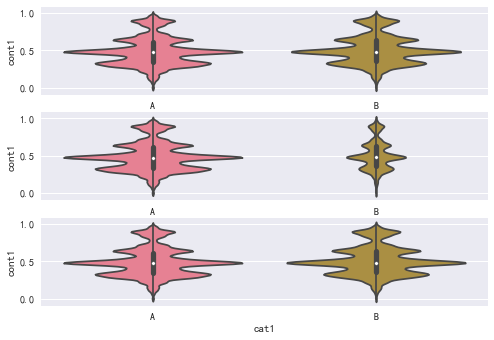

In [121]:
fig,axes=plt.subplots(3,1)
sns.violinplot(x="cat1",y="cont1",data=train_data,scale="area",ax=axes[0]) #如果为"area"，每把小提琴将有相同的面积(上图)
sns.violinplot(x="cat1",y="cont1",data=train_data,scale="count",ax=axes[1]) #如果为"count"，小提琴的宽度将根据该小组中观察的数量来缩放（中图）
sns.violinplot(x="cat1",y="cont1",data=train_data,scale="width",ax=axes[2]) #如果为"age"，每把小提琴将有相同的宽度（下图）
plt.show()

#### cut：float，距离，以带宽大小为单位，以控制小提琴图外壳延伸超过内部极端数据点的密度。设置为0以将小提琴范围限制在观察数据的范围内（即，在ggplot中具有与trim = true相同的效果)

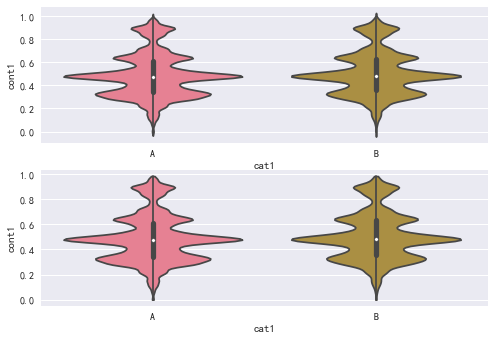

In [122]:
fig,axes=plt.subplots(2,1)
sns.violinplot(x="cat1",y="cont1",data=train_data,ax=axes[0]) #上图
sns.violinplot(x="cat1",y="cont1",data=train_data,cut=0,ax=axes[1]) #下图
plt.show()

#### width：float，控制钢琴图的宽度（比例）

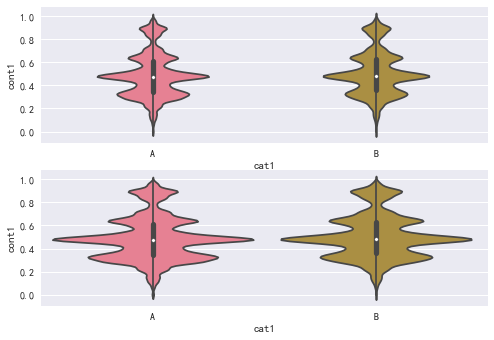

In [123]:
fig,axes=plt.subplots(2,1)
sns.violinplot(x="cat1",y="cont1",data=train_data,ax=axes[0],width=0.5) #上图
sns.violinplot(x="cat1",y="cont1",data=train_data,ax=axes[1],width=0.9) #下图
plt.show()

#### orient："v"|"h" 用于控制图像使水平还是竖直显示（这通常是从输入变量的dtype推断出来的，此参数一般当不传入x、y，只传入data的时候使用）

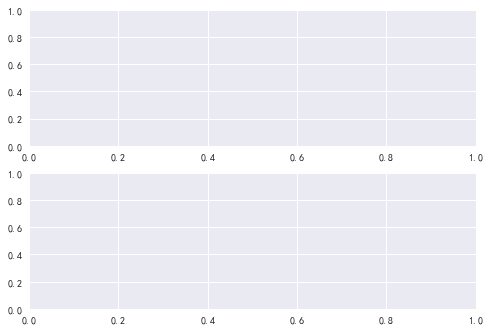

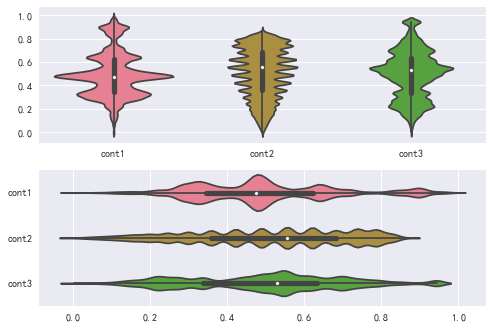

In [125]:
fig,axes=plt.subplots(2,1)
sns.violinplot(data=train_data[["cont1","cont2","cont3"]],orient="v",ax=axes[0]) #上图
sns.violinplot(data=train_data[["cont1","cont2","cont3"]],orient="h",ax=axes[1]) #下图
plt.show()

### barplot函数

条形图表示数值变量与每个矩形高度的中心趋势的估计值，并使用误差线提供关于该估计值附近的不确定性的一些指示。
具体用法如下：
seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=(function mean), ci=95, n_boot=1000, units=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)

Seaborn会对”color“列中的数值进行归类后按照estimator参数的方法（默认为平均值）计算相应的值，计算出来的值就作为条形图所显示的值（条形图上的误差棒则表示各类的数值相对于条形图所显示的值的误差）

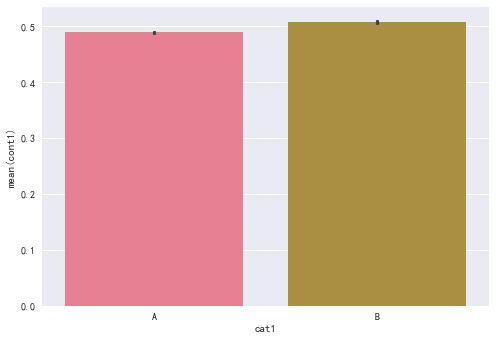

In [135]:
sns.barplot(x="cat1",y="cont1",data=train_data)
plt.show()

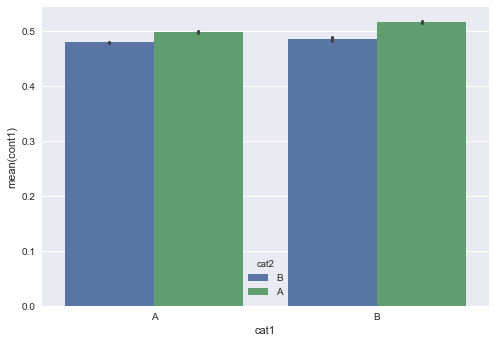

In [13]:
# hue（str）：dataframe的列名，按照列名中的值分类形成分类的条形图

sns.barplot(x="cat1",y="cont1",data=train_data,hue="cat2")
plt.show()

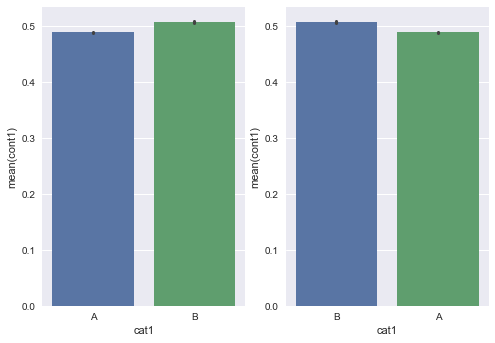

In [14]:
# order, hue_order (lists of strings)：用于控制条形图的顺序

fig,axes=plt.subplots(1,2)
sns.barplot(x="cat1",y="cont1",data=train_data,ax=axes[0])
sns.barplot(x="cat1",y="cont1",data=train_data,ax=axes[1],order=["B","A"])
plt.show()

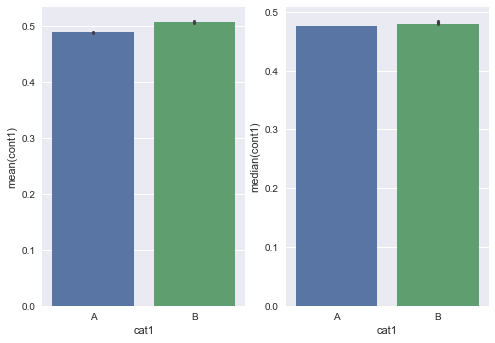

In [17]:
# estimator:<function name>控制条形图的取整列数据的什么值

fig,axes=plt.subplots(1,2)
sns.barplot(x="cat1",y="cont1",data=train_data,ax=axes[0]) #左图，默认为平均值
sns.barplot(x="cat1",y="cont1",data=train_data,estimator=np.median,ax=axes[1]) #右图，中位数
plt.show()

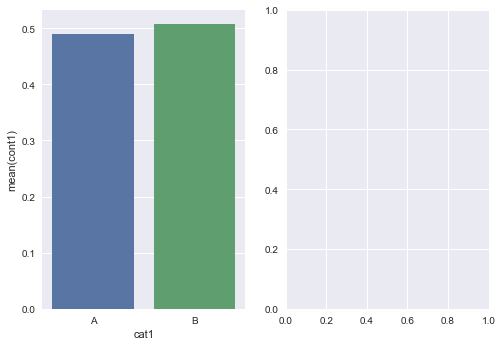

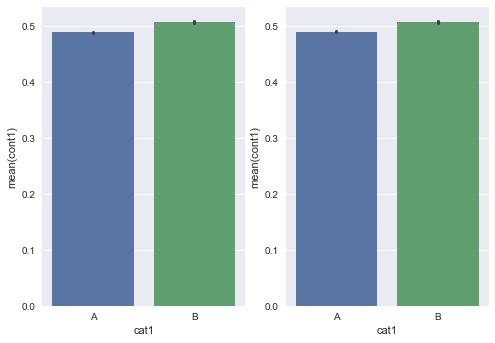

In [19]:
# ci（float）: 允许的误差的范围（控制误差棒的百分比，在0-100之间）,若填写"sd",则误差棒用标准误差。(默认为95)

fig,axes=plt.subplots(1,2)
sns.barplot(x="cat1",y="cont1",data=train_data,ci=95,ax=axes[0]) #左图
sns.barplot(x="cat1",y="cont1",data=train_data,ci=90,ax=axes[1]) #右图
plt.show()

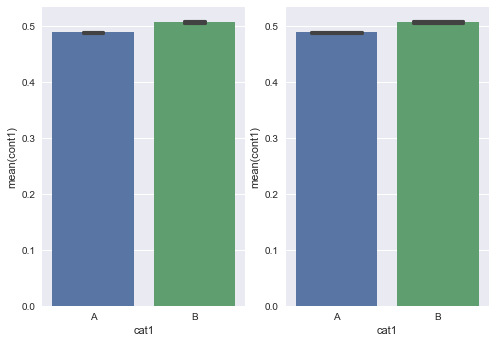

In [20]:
# capsize（float）:设置误差棒帽条（上下两根横线）的宽度

fig,axes=plt.subplots(1,2)
sns.barplot(x="cat1",y="cont1",data=train_data,ax=axes[0],capsize=.2) #左图
sns.barplot(x="cat1",y="cont1",data=train_data,ax=axes[1],capsize=.5) #右图
plt.show()

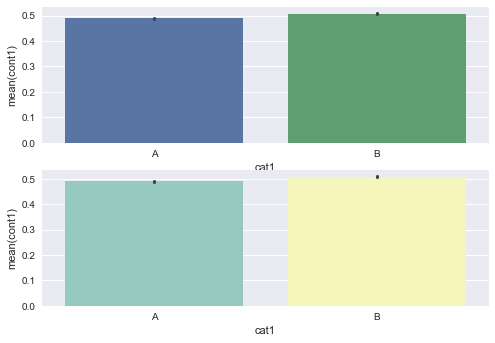

In [22]:
# palette:调色板，控制不同的颜色style

fig,axes=plt.subplots(2,1)
sns.barplot(x="cat1",y="cont1",data=train_data,ax=axes[0]) #上图
sns.barplot(x="cat1",y="cont1",data=train_data,palette="Set3",ax=axes[1]) #下图
plt.show()

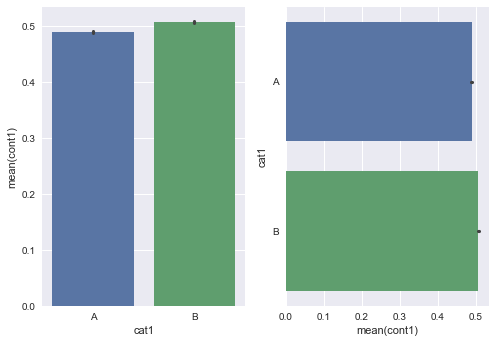

In [23]:
# X,Y轴互换

fig,axes=plt.subplots(1,2)
sns.barplot(x="cat1",y="cont1",data=train_data,ax=axes[0]) #左图
sns.barplot(x="cont1",y="cat1",data=train_data,ax=axes[1]) #右图
plt.show()

### pointplot函数

点图代表散点图位置的数值变量的中心趋势估计，并使用误差线提供关于该估计的不确定性的一些指示。点图可能比条形图更有用于聚焦一个或多个分类变量的不同级别之间的比较。他们尤其善于表现交互作用：一个分类变量的层次之间的关系如何在第二个分类变量的层次之间变化。连接来自相同色调等级的每个点的线允许交互作用通过斜率的差异进行判断，这比对几组点或条的高度比较容易。

具体用法如下：
seaborn.pointplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=(function mean), ci=95, n_boot=1000, units=None, markers='o', linestyles='-', dodge=False, join=True, scale=1, orient=None, color=None, palette=None, errwidth=None, capsize=None, ax=None, **kwargs)

下面继续使用之前的数据集进行绘图，和barplot相同的参数就不再具体演示，重点演示pointplot独有的。

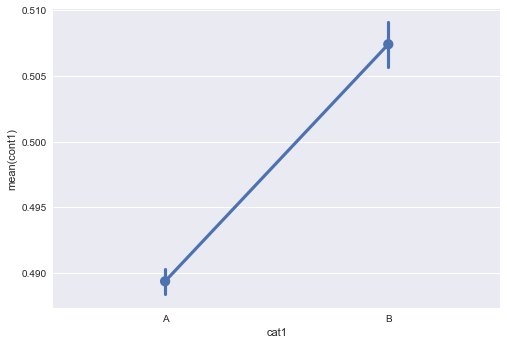

In [6]:
sns.pointplot(x="cat1",y="cont1",data=train_data)
plt.show()

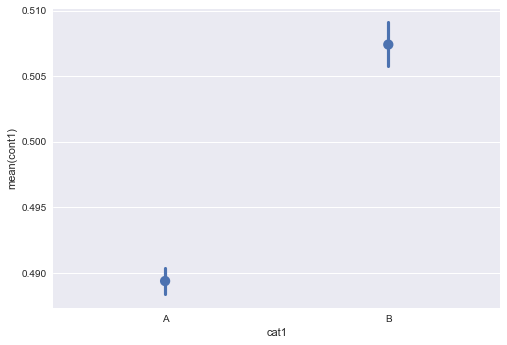

In [7]:
# 图中的点为这组数据的平均值点，竖线则为误差棒，默认两个均值点会相连接，若不想显示，可以通过join参数实现：

sns.pointplot(x="cat1",y="cont1",data=train_data,join=False)
plt.show()

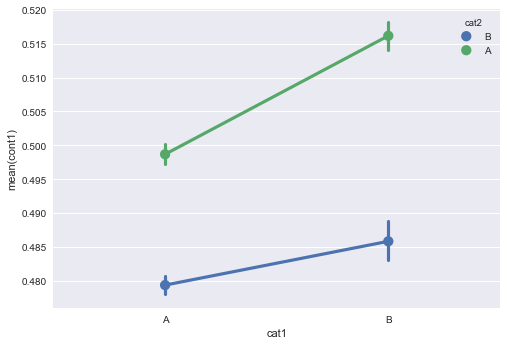

In [8]:
# 之前我们演示过barplot的hue参数，现在我们看一下pointplot的hue参数：

sns.pointplot(x="cat1",y="cont1",data=train_data,hue="cat2")
plt.show()

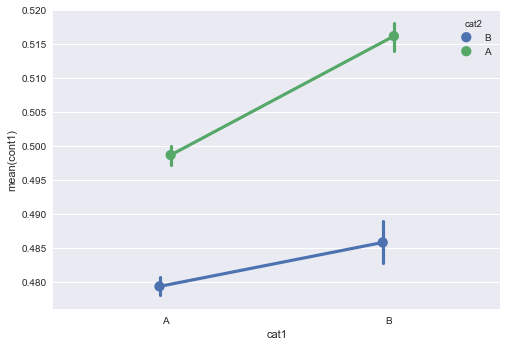

In [9]:
# 我们可以看到两个类别的误差棒重叠在了一起，使数据观测不清晰。怎么解决这个问题呢？pointplot的dodge参数可以使重叠的部分错开：

sns.pointplot(x="cat1",y="cont1",data=train_data,hue="cat2",dodge=True)
plt.show()

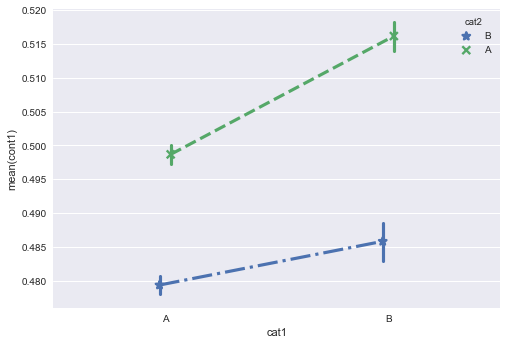

In [10]:
# 接下来我们对均值点的样式（由参数markers控制）和相同色调的点之间的连线（由参数linestyles控制）做一下改动。其他样式请参考matplotlib线条样式

sns.pointplot(x="cat1",y="cont1",data=train_data,hue="cat2",dodge=True,markers=["*","x"],linestyles=["-.","--"])
plt.show()

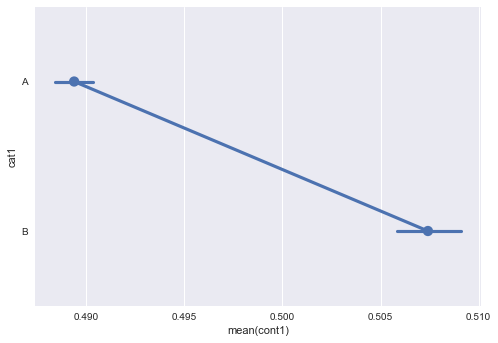

In [11]:
# 将X，Y轴互换

sns.pointplot(x="cont1",y="cat1",data=train_data)
plt.show()

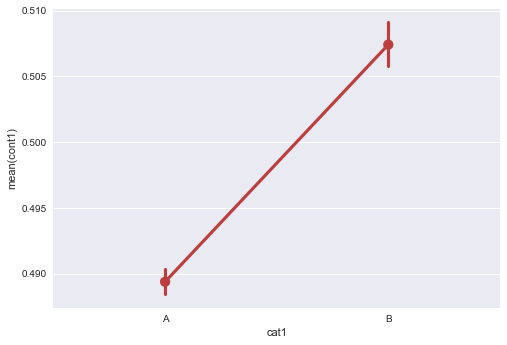

In [12]:
# 通过color参数控制不同单层图的颜色

sns.pointplot(x="cat1",y="cont1",data=train_data,color="#bb3f3f")
plt.show()

### stripplot函数

具体用法如下：
stripplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, jitter=False, split=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)

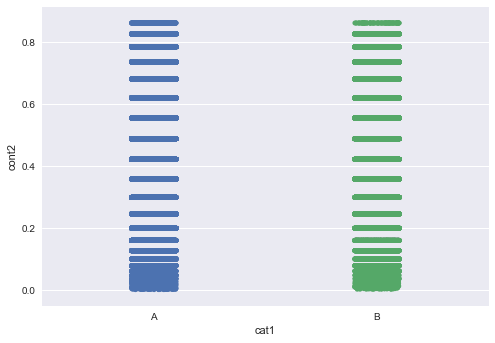

In [25]:
sns.stripplot(x=train_data.cat1, y=train_data.cont2, data=train_data, jitter=True)
plt.show()

### swarmplot函数

因为计算资源消耗太大，一般不建议使用。

具体用法如下：
swarmplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, split=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)


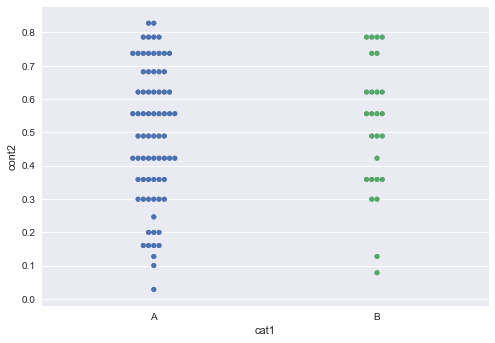

In [27]:
sns.swarmplot(x=train_data.cat1[1:100], y=train_data.cont2[1:100], data=train_data[1:100])
plt.show()

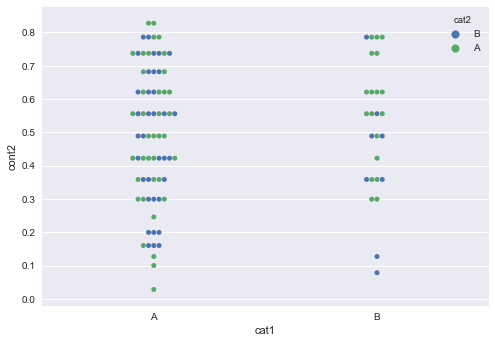

In [28]:
#para:hue
sns.swarmplot(x=train_data.cont1[1:100], y=train_data.cont2[1:100], hue=train_data.cat2[1:100], data=train_data[1:100])
plt.show()

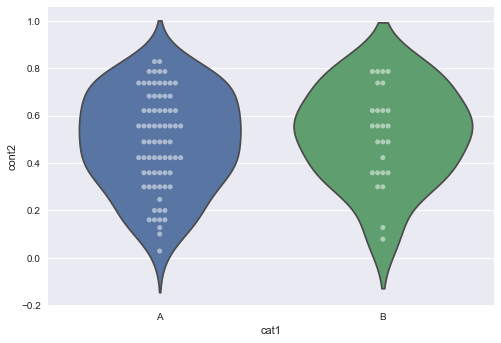

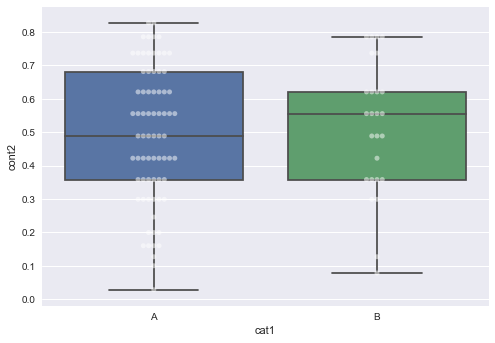

In [29]:
##combine the boxplot/violinplot with swarmplot
sns.violinplot(x=train_data.cat1[1:100], y=train_data.cont2[1:100], data=train_data[1:100], inner=None)
sns.swarmplot(x=train_data.cat1[1:100], y=train_data.cont2[1:100], data=train_data[1:100], color='w',alpha=0.5)
plt.show()


sns.boxplot(x=train_data.cat1[1:100], y=train_data.cont2[1:100], data=train_data[1:100])
sns.swarmplot(x=train_data.cat1[1:100], y=train_data.cont2[1:100], data=train_data[1:100], color='w',alpha=0.5)
plt.show()

### factorplot函数 ：multi-panel categorical plots

具体用法如下：
factorplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x00000172A586D400>, ci=95, n_boot=1000, units=None, order=None, hue_order=None, row_order=None, col_order=None, kind='point', size=4, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)


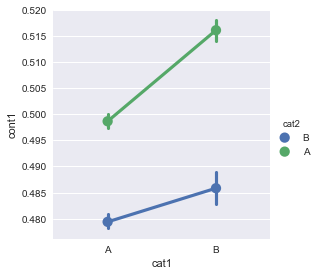

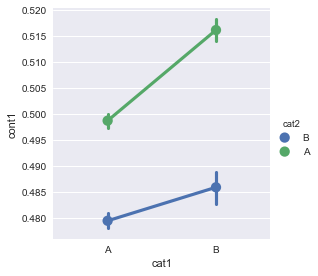

In [31]:
sns.factorplot(x='cat1', y='cont1', hue='cat2', data=train_data) #proudce a pointplot by default
plt.show()

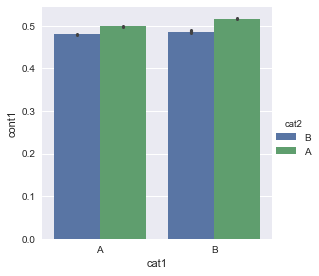

In [32]:
sns.factorplot(x='cat1', y='cont1', hue='cat2', data=train_data, kind='bar')
plt.show()

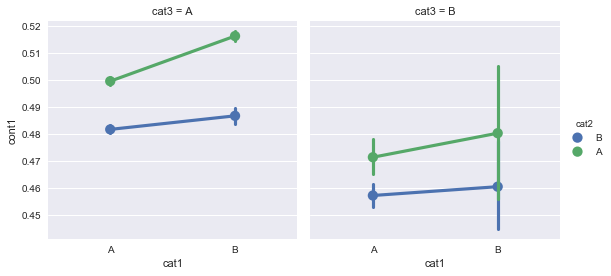

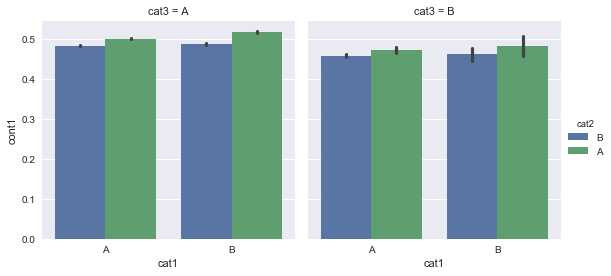

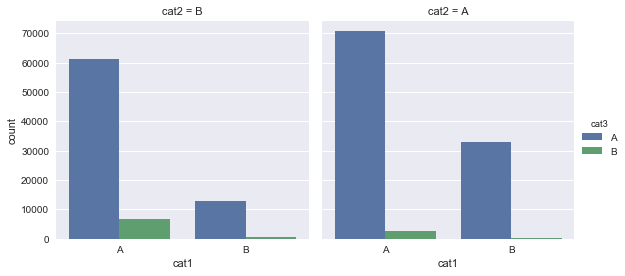

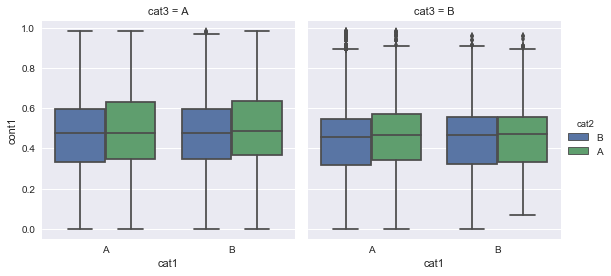

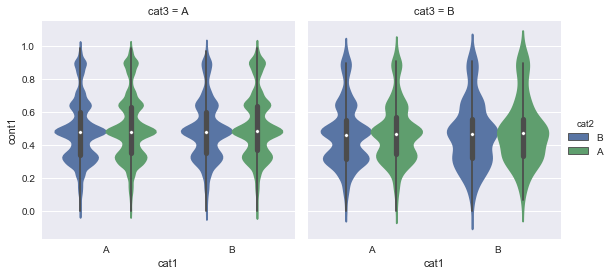

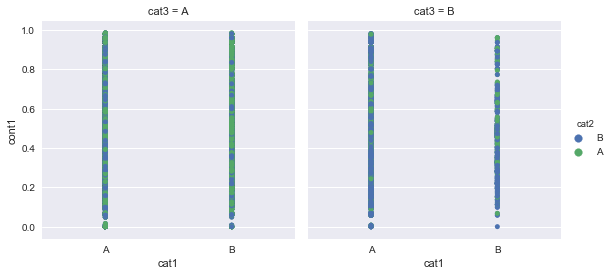

In [33]:
#para:kind  anyone in {point, bar, count, box, violin, strip}
for kind in ['point', 'bar', 'count', 'box', 'violin', 'strip']:
    try:
        sns.factorplot(x='cat1', y='cont1', hue='cat2', data=train_data,
                   col='cat3', kind=kind)
        plt.show()
    except: #count can just show only one category variable
        sns.factorplot(x='cat1', hue='cat3', data=train_data,
                       col='cat2', kind=kind)
        plt.show()

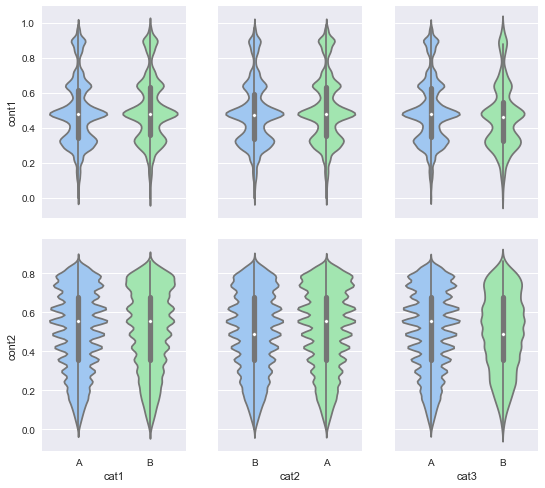

In [34]:
# using PairGrid to create FacetGrid
g = sns.PairGrid(train_data,
                 x_vars=["cat1", "cat2", "cat3"],
                 y_vars=["cont1", "cont2"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel")
plt.show()

## 绘制线性回归图

主要函数为lmplot，也可以用regplot。对于残差分析可以使用residplot。
另外，对于jointplot和pairplot中也有参数可以绘制线性回归线。

lmplot具体用法如下：
lmplot(x, y, data, hue=None, col=None, row=None, palette=None, col_wrap=None, size=5, aspect=1, markers='o', sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None)

regplot具体用法如下：
regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)



lmplot必须提供data，regplot可以不提供，以下例子可以看出来：

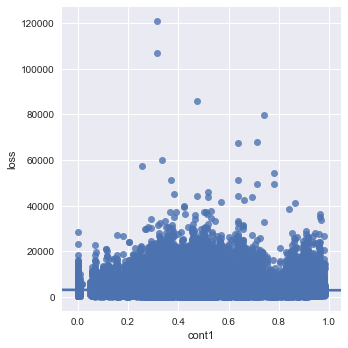

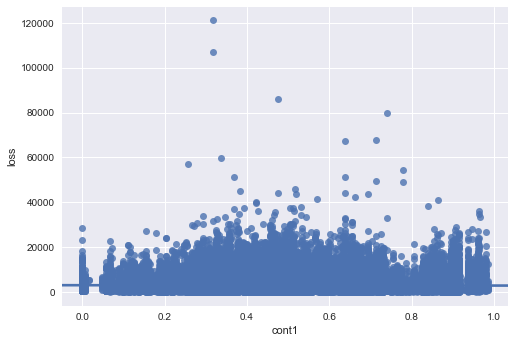

In [35]:
#linear regression:continous
sns.lmplot(x='cont1', y='loss', data=train_data)
plt.show()

# sns.regplot(x='cont1', y='loss', data=train_data)
sns.regplot(x=train_data['cont1'], y=train_data['loss'])
plt.show()

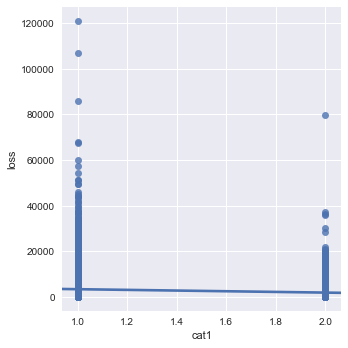

In [45]:
#linear regression: discrete
df=train_data
df['cat1']=train_data['cat1'].map({'A':1,'B':2})
sns.lmplot(x='cat1', y='loss', data=df)
plt.show()

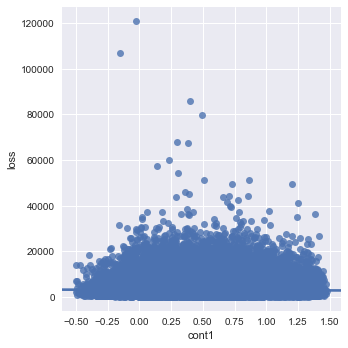

In [43]:
#para:x_jitter/y_jitter
sns.lmplot(x='cont1', y='loss', data=train_data, x_jitter=0.5)
plt.show()

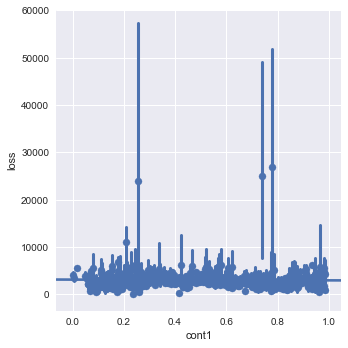

In [42]:
#para:x_estimators
sns.lmplot(x='cont1', y='loss', data=train_data, x_estimator=np.mean)
plt.show()

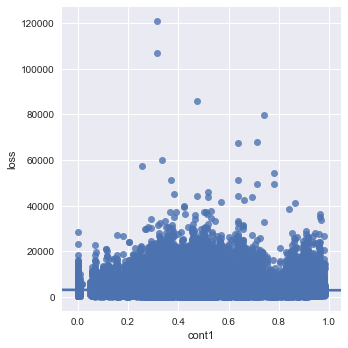

In [39]:
#para:ci
sns.lmplot(x='cont1', y='loss', data=train_data, ci=97.5) #95 at default
plt.show()

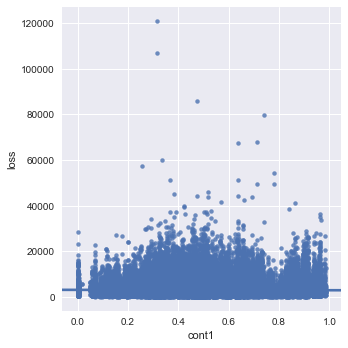

In [46]:
#para:scatter_kws 传输设置给matplotlib.pyplot.scatter
sns.lmplot(x='cont1', y='loss', data=train_data, scatter_kws={'s':20}) #20 at default
plt.show()

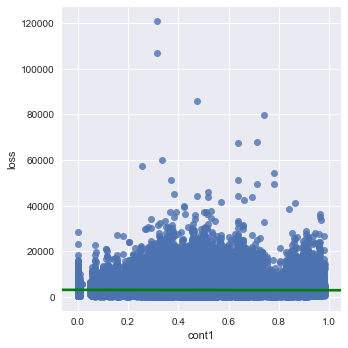

In [47]:
#para:line_kws 传输设置给matplotlib.pyplot.plot
sns.lmplot(x='cont1', y='loss', data=train_data, line_kws={'color':'green'}) 
plt.show()

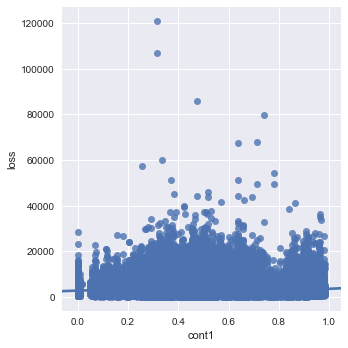

In [48]:
#para:order 多项式回归
sns.lmplot(x='cont1', y='loss', data=train_data, order=3) 
plt.show()

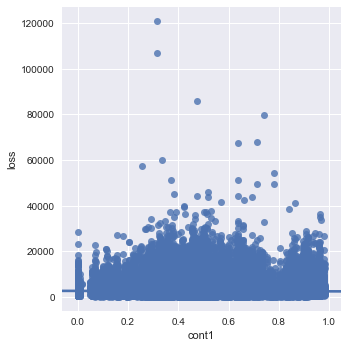

In [49]:
#para:robust Robust回归，减少异常值影响
sns.lmplot(x='cont1', y='loss', data=train_data, robust=True) 
plt.show()

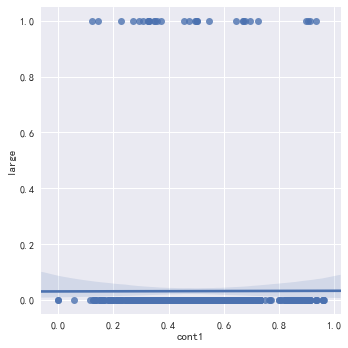

In [68]:
#para:logistic Logistic回归
df=train_data.iloc[0:1000,:]
df['large']=df['loss'].apply(lambda x: 1 if x > 10000 else 0)

sns.lmplot(x='cont1', y='large', data=df, logistic=True) 
plt.show()

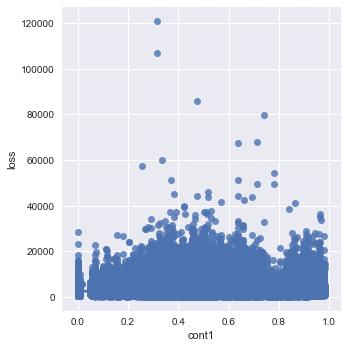

In [63]:
# para:lowess 非参数回归
sns.lmplot(x='cont1', y='loss', data=train_data, lowess=True) 
plt.show()

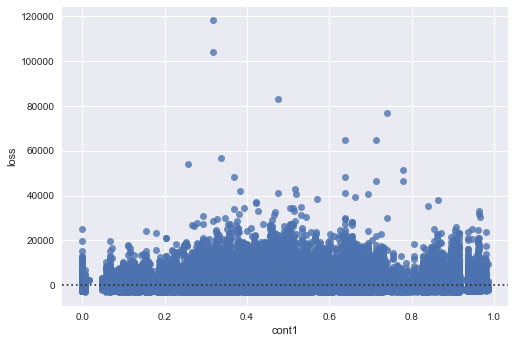

In [53]:
# linear regression: residual plot
sns.residplot(x='cont1', y='loss', data=train_data)
plt.show()

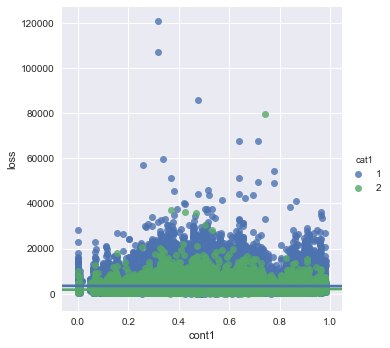

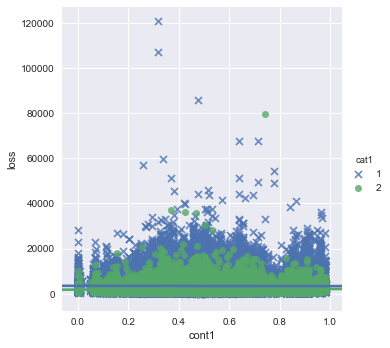

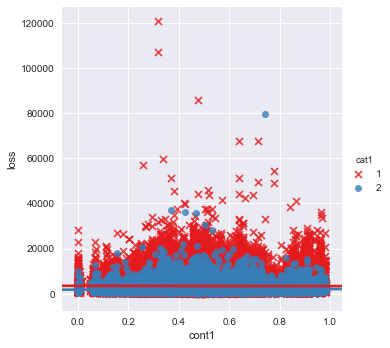

In [54]:
# linear regression: different linear model using hue
sns.lmplot(x='cont1', y='loss', data=train_data, hue='cat1')
plt.show()

sns.lmplot(x='cont1', y='loss', data=train_data, hue='cat1', markers=['x','o'])
plt.show()

sns.lmplot(x='cont1', y='loss', data=train_data, hue='cat1', markers=['x','o'], palette='Set1')
plt.show()

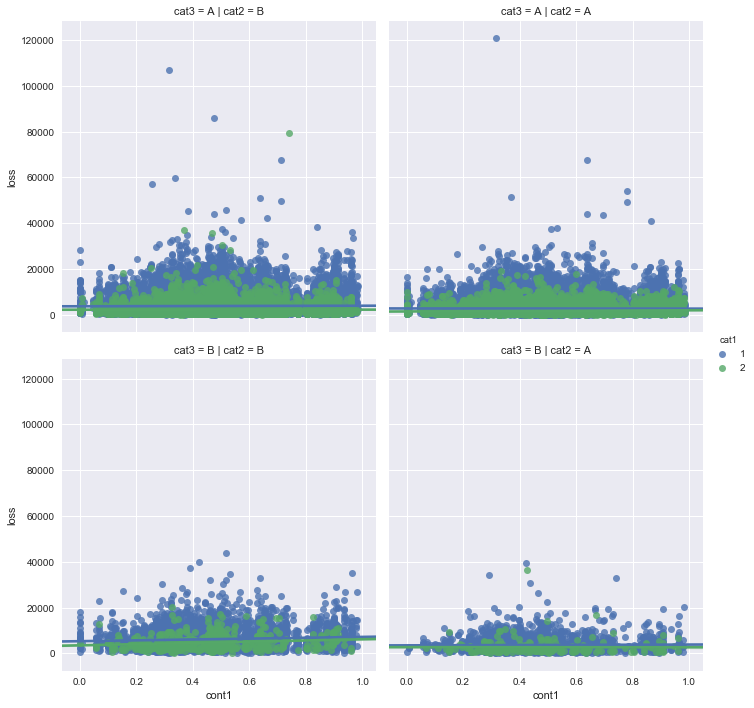

In [55]:
# linear regression: different linear model using facets
sns.lmplot(x='cont1', y='loss', data=train_data, hue='cat1',col='cat2', row='cat3')
plt.show()

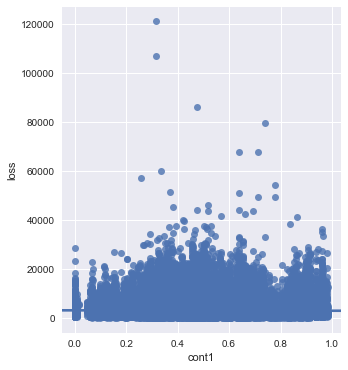

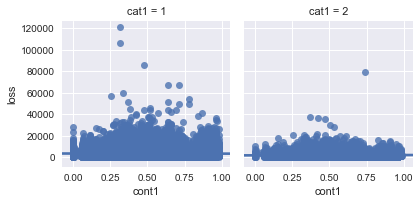

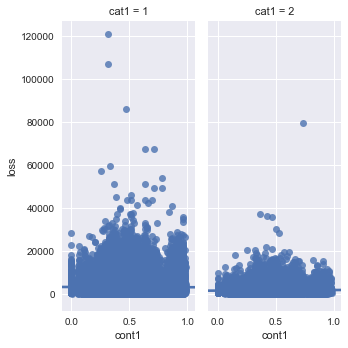

In [56]:
# control the size and shape
fig, axes = plt.subplots(figsize=(5, 6))
sns.regplot(x="cont1", y="loss", data=train_data, ax=axes)
plt.show()

sns.lmplot(x="cont1", y="loss", col="cat1", data=train_data,col_wrap=2, size=3)
plt.show()

sns.lmplot(x="cont1", y="loss", col="cat1", data=train_data,aspect=0.5)
plt.show()

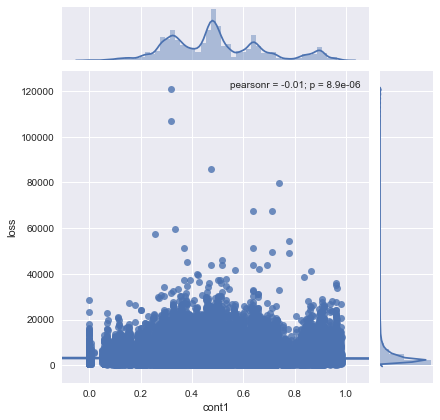

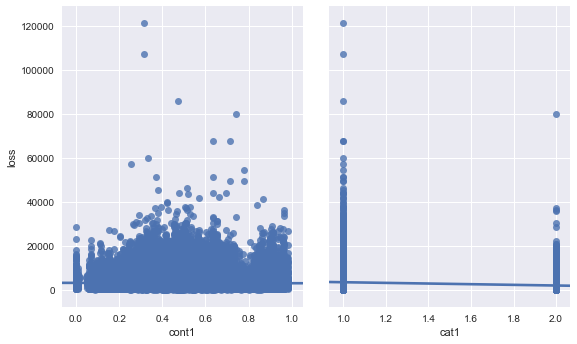

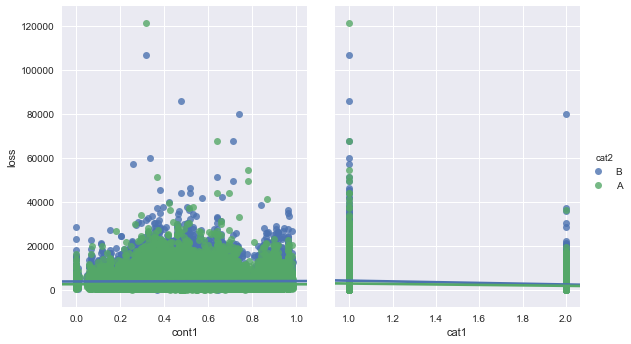

In [57]:
# other func containing regression
sns.jointplot(x="cont1", y="loss", data=train_data, kind="reg")
plt.show()

sns.pairplot(train_data, x_vars=["cont1", "cat1"], y_vars=["loss"],size=5, aspect=.8, kind="reg")
plt.show()
            
sns.pairplot(train_data, x_vars=["cont1", "cat1"], y_vars=["loss"],hue="cat2", size=5, aspect=.8, kind="reg")
plt.show()

## 附录：

In [ ]:
'''

# 保存图片时使用以下命令：

sns.plt.savefig('test.png', dpi=1000)





##以下为设置案例：

def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

## 样式设置
##remove the axes spines
sinplot()
sns.despine() # must be used after plot func

#para:offset/trim 
sns.despine(offset=10, trim=True)
#para:left/right/top/bottom control which spines to be removed
sns.despine(offset=10, trim=True, left=True)



##temporarily setting the figure style
with sns.axes_style("darkgrid"):
    sinplot()



##customize the seaborn styles
sns.axes_style()
sns.set_style("darkgrid", {"axes.facecolor": ".5"})
sinplot()



##temporarily setting the figure scale
with sns.plotting_context("talk"):
    sinplot()
    
    

##customize the seaborn scale
sns.plotting_context()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()





## 颜色设置


##customize the color
sns.set_palette("husl")
sinplot()

##temporarily setting the figure scale
with sns.color_palette("PuBuGn_d"):
    sinplot()


# 默认颜色主题共有六种不同的变化分别是：deep, muted, pastel, bright, dark, colorblind
for col in ['deep','muted','pastel','bright','dark','colorblind','hls', 'husl']:
    current=sns.color_palette(col)
    sns.palplot(current)
    




## 1.qualitative color palette

#seaborn color palette
current_palette = sns.color_palette()
sns.palplot(current_palette) #deep, muted, bright, pastel dark, colorblind


#circular color systems
sns.palplot(sns.color_palette("hls", n_colors=10))
sns.palplot(sns.hls_palette(n_colors=10, h=0.1, l=0.6, s=0.65))

sns.palplot(sns.color_palette("husl", n_colors=10))
sns.palplot(sns.hls_palette(n_colors=10, h=0.01, l=0.65, s=0.9))


#categorical Color Brewer palettes
sns.palplot(sns.color_palette("Paired", n_colors=10))

sns.palplot(sns.color_palette("Set1", n_colors=10)) # Set1, Set2, Set3

sns.palplot(sns.choose_colorbrewer_palette("diverging", as_cmap=False)) # sequential, diverging, qualitative


flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))



#xkcd color palette
sns.xkcd_rgb["pale red"]

plt.plot([0, 1], [0, 1], sns.xkcd_rgb["pale red"], lw=3)

colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))



## 2.sequential color palettes

#sequential Color Brewer palettes
sns.palplot(sns.color_palette("Blues"))
sns.palplot(sns.color_palette("Blues_d"))
sns.palplot(sns.color_palette("Blues_r"))

sns.palplot(sns.color_palette("BuGn")) 
sns.palplot(sns.color_palette("BuGn_d")) #Blues and Greens
sns.palplot(sns.color_palette("BuGn_r")) 


for clr in ["Blues", "Greens", "Reds"]:
    sns.palplot(sns.color_palette(clr))



#sequential cubehelix palettes
sns.palplot(sns.color_palette("cubehelix", n_colors=10))

sns.palplot(sns.cubehelix_palette(n_colors=10, start=0.5, rot=-0.75, dark=0, light=0.95, reverse=True))

#para:as_cmap
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x, y, cmap=cmap, shade=True)


sns.choose_cubehelix_palette(as_cmap=False)
sns.choose_cubehelix_palette(as_cmap=True)



#customized sequential palettes
sns.palplot(sns.light_palette("green"))

sns.palplot(sns.dark_palette("purple"))

sns.palplot(sns.light_palette("navy", reverse=True))

pal = sns.dark_palette("palegreen", as_cmap=True)
sns.kdeplot(x,y, cmap=pal)


sns.palplot(sns.light_palette((210, 90, 60), input="husl")) 

sns.palplot(sns.dark_palette("muted purple", input="xkcd"))



## 3. diverging color palettes
sns.palplot(sns.color_palette("BrBG", n_colors=7))

sns.palplot(sns.color_palette("RdBu_r", n_colors=7))

sns.palplot(sns.color_palette("coolwarm", n_colors=7))


#customized diverging palettes

sns.palplot(sns.diverging_palette(220, 20, n=7))

sns.palplot(sns.diverging_palette(145, 280, s=85, l=25, n=7))

sns.palplot(sns.diverging_palette(10, 220, sep=80, n=7))

sns.palplot(sns.diverging_palette(255, 133, l=60, n=7, center="dark"))

'''